In [2]:
# Import Required Libraries
import pandas as pd
import pickle
import numpy as np

### Import Data Sample

In [102]:
# Auxillary Test File (Unmodified)
file = open('./Data/flight_2019_sample','rb')
sample_2019 = pickle.load(file)
file.close()

In [3]:
# Feature Engineered DataFrame
data_feature_modified = pd.read_csv('./Data/Feature_data_sample.csv')

### Adjust NaN Values and Prune Columns With more than 30% NaN Values

In [4]:
# Retrieve only columns with less than 30% NaN values
Flight_sample = data_feature_modified.loc[:, data_feature_modified.isnull().mean() < .3]
Flight_sample.drop(['tail_num'],axis=1, inplace=True)

# Get columns with NaN values present
NaN_cols = Flight_sample.columns[Flight_sample.isnull().any()]

# View Column % NaN Values
print('Before:','\n',Flight_sample[NaN_cols].isna().sum()/len(Flight_sample)*100)

# Adjust NaN values by replacing them with respective column means to prevent data loss
for column in NaN_cols:
    Flight_sample[column].fillna(value=Flight_sample[column].mean(), inplace=True)

print('\n')
print('After:','\n',Flight_sample[NaN_cols].isna().sum()/len(Flight_sample)*100)

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Before: 
 dep_time               1.718452
dep_delay              1.718763
taxi_out               1.771638
wheels_off             1.771638
wheels_on              1.826691
taxi_in                1.826691
arr_time               1.826691
arr_delay              2.036741
actual_elapsed_time    2.036741
air_time               2.036741
dtype: float64


After: 
 dep_time               0.0
dep_delay              0.0
taxi_out               0.0
wheels_off             0.0
wheels_on              0.0
taxi_in                0.0
arr_time               0.0
arr_delay              0.0
actual_elapsed_time    0.0
air_time               0.0
dtype: float64


In [5]:
# Find any records with multiple flights, if none - then remove column from dataset as all values are 1
print(Flight_sample.loc[Flight_sample['flights'] == 0.0])
print(Flight_sample.loc[Flight_sample['flights'] < 1.0])
Flight_sample.drop(['flights','year'], axis=1, inplace=True)

Empty DataFrame
Columns: [mkt_unique_carrier, branded_code_share, mkt_carrier_fl_num, op_unique_carrier, op_carrier_fl_num, origin_airport_id, dest_airport_id, crs_dep_time, dep_time, dep_delay, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, arr_delay, cancelled, diverted, dup, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, fl_date, year, is_delayed, flight_speed, flight_haul_type, flight_month, arrival_hour_of_day, departure_hour_of_day, percent_delay, percent_flights, avg_flights, avg_passengers, total_distance, total_passengers, avg_fuel, state, avgCloud, avgDryDays, avgRainDays, avgSnowDays, avgThunderDays, early_count, early_avgDryDays, early_avgRainDays, early_avgCloud, early_avgSnowDays, delay_count, delay_avgDryDays, delay_avgRainDays, delay_avgCloud, delay_avgSnowDays]
Index: []

[0 rows x 56 columns]
Empty DataFrame
Columns: [mkt_unique_carrier, branded_code_share, mkt_carrier_fl_num, op_unique_carrier, op_carrier_fl_num, origin_airport

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Determine correlated Feature Data

In [6]:
# Calculate Correlated features from sample
Corr = Flight_sample.corr(method ='pearson')

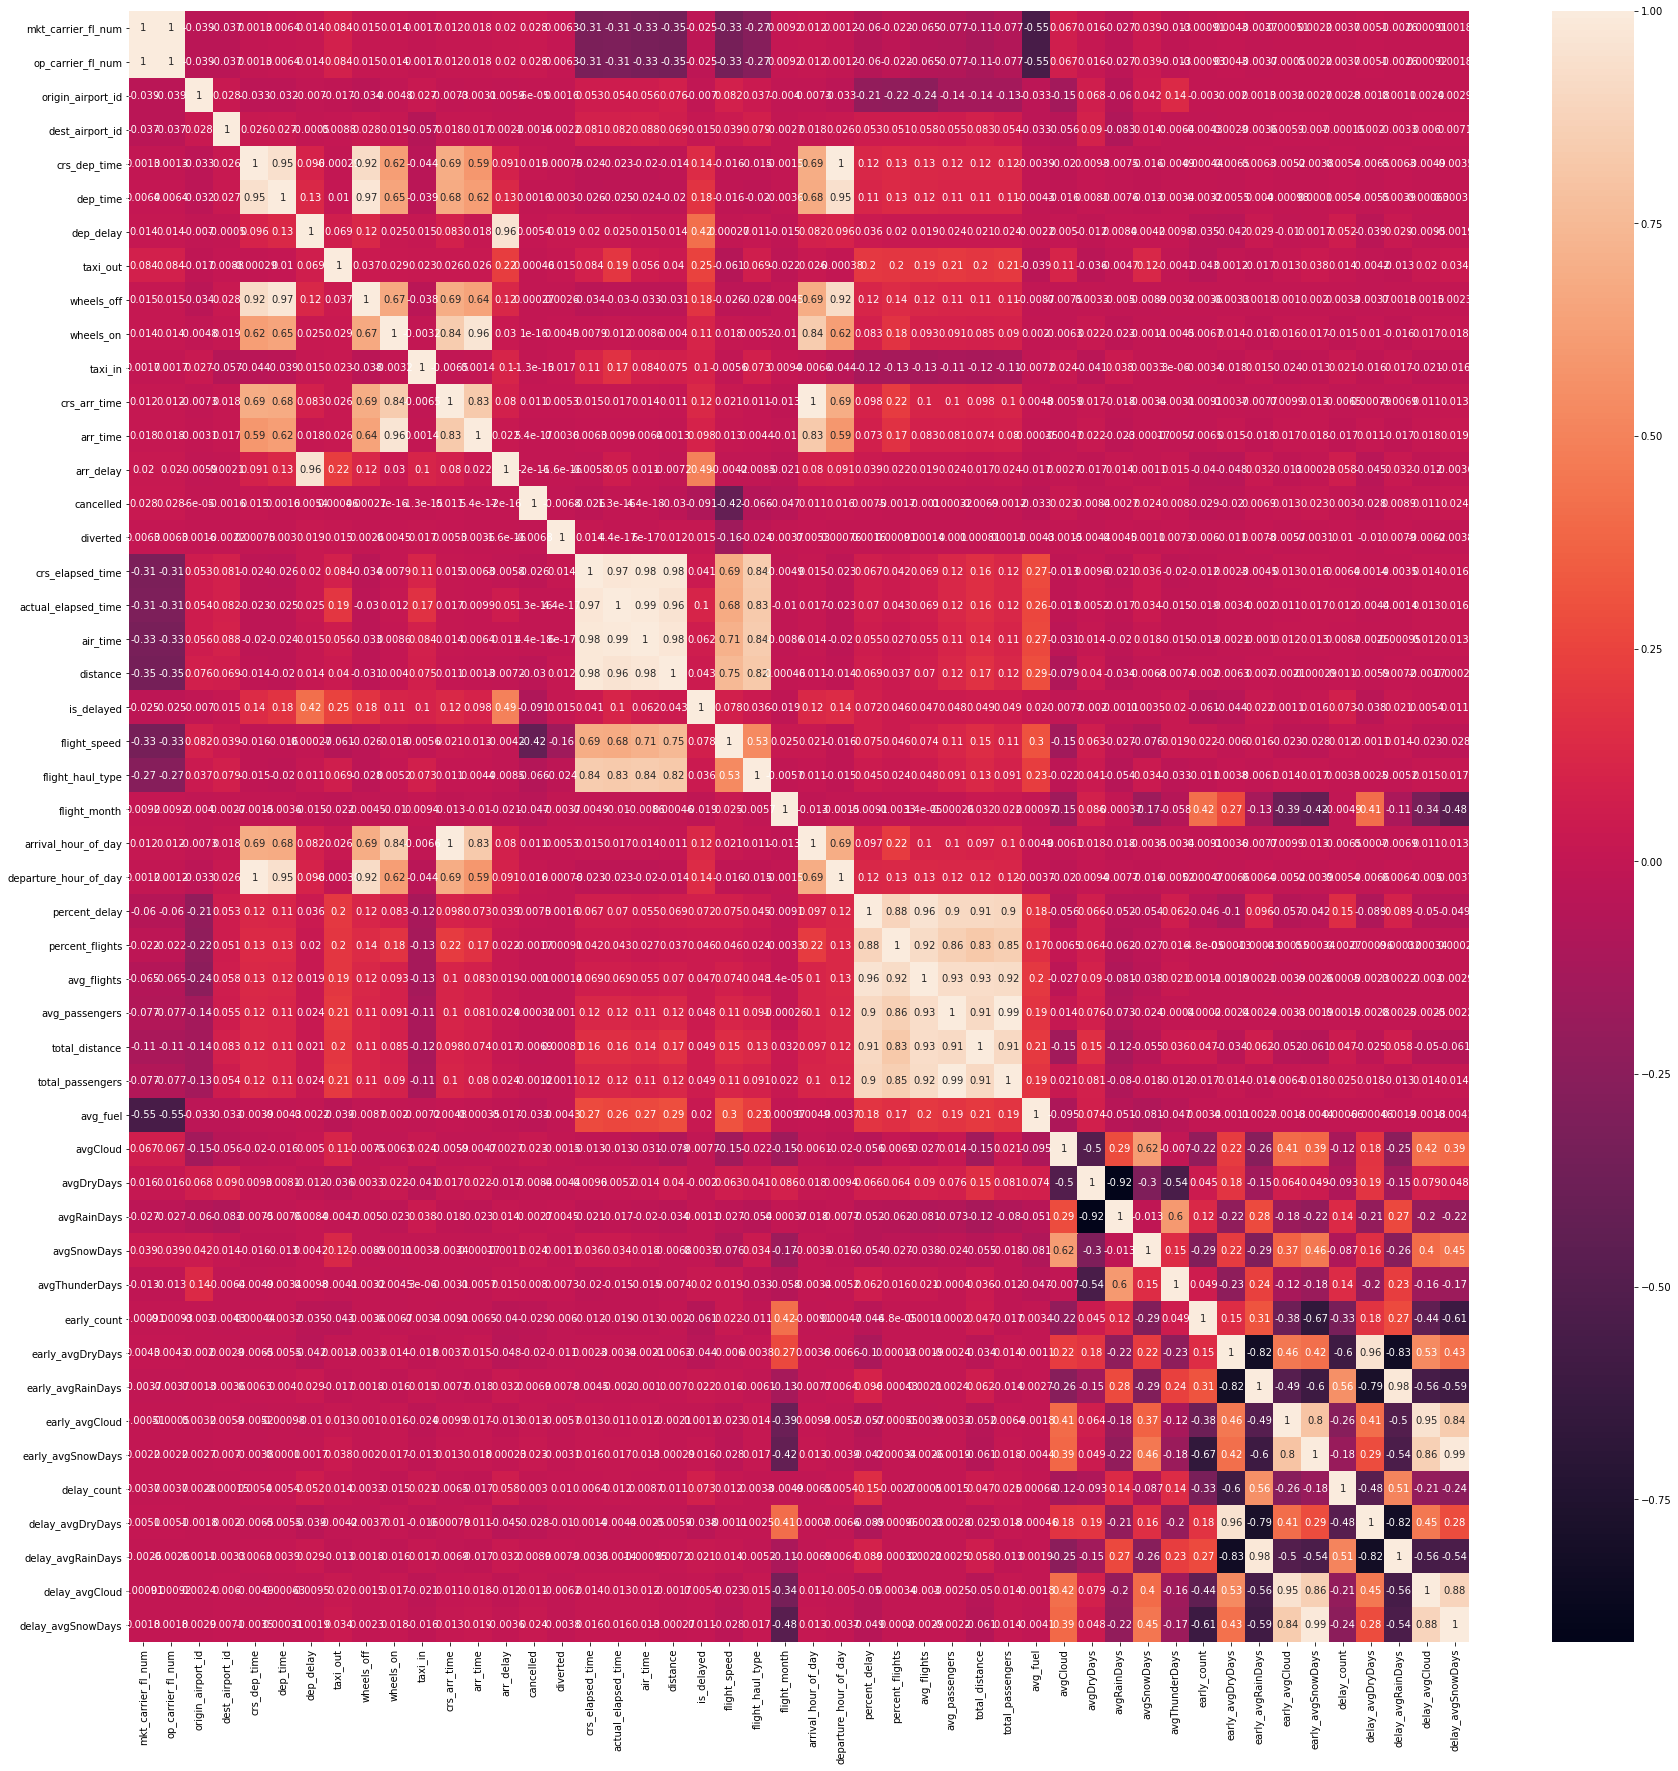

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sn.heatmap(Corr, annot=True)
plt.show()

### Export Data Sample

In [8]:
# Export Sample Data
file = './Data/Sample_Dataset'
outfile = open(file,'wb')
pickle.dump(Flight_sample,outfile)
outfile.close()

In [9]:
import gc
collected = gc.collect()
print("Garbage collector: collected", 
          "%d objects." % collected) 

Garbage collector: collected 138846 objects.
